## Impostazione del lavoro e caricamento delle librerie

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

RANDOM_SEED=1
plt.rcParams["figure.figsize"] = (10,8)
sns.set_theme(palette="dark")

## 1. Analisi esplorativa dei dati

In [ ]:
# Caricamento del file
df=pd.read_csv("https://raw.githubusercontent.com/emicopy/datasets/refs/heads/main/credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. Preprocessing dei dati

### Gestione dei dati mancanti

In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### Standardizzazione dei dati
Il dataset contiene parecchie variabili continue, che hanno un range molto ampio. La standardizzazione è necessaria per poter elaborare dei modelli efficaci.

In [ ]:
ss=StandardScaler()

#Dichiariamo le colonne da standardizzare:
columns_to_std=df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']]

#Colonne Standardizzate:
columns_std=ss.fit_transform(columns_to_std.values)

#Le rimettiamo in un nuovo DataFrame:
columns_std=pd.DataFrame(columns_std, columns=columns_to_std.columns, index=df.index)

#Creiamo un dataframe tenendo soltanto le colonne che non sono state standardizzate
df_drop=df.drop(columns_to_std, axis=1)

#Ricostruiamo il dataframe finale con i nuovi valori standardizzati
df=pd.concat([df_drop, columns_std], axis=1)

#A questo punto possiamo dichiarare il vettore che utilizzeremo per i modelli
X=df.drop("CUST_ID",axis=1).values

## 3. Segmentazione tramite clustering

#### Elbow method
Utilizziamo l'elbow method per vedere quanti cluster è necessario scegliere

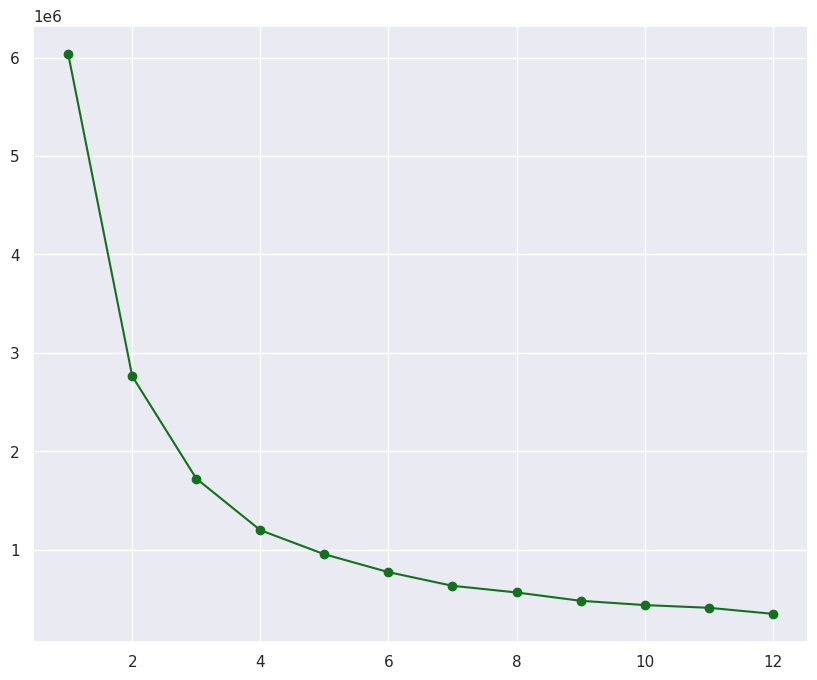

In [ ]:
ssd={}

for k in range(1,13):
    kmeans=KMeans(n_clusters=k, init="k-means++", random_state=RANDOM_SEED)
    kmeans.fit(X)
    ssd[k]=round(kmeans.inertia_,2)

plt.plot(list(ssd.keys()),list(ssd.values()), marker="o", color="g")
plt.show()

#### Creazione del modello

In [ ]:
kmeans=KMeans(n_clusters=4, init="k-means++", random_state=RANDOM_SEED)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=1)

In [ ]:
kmeans.inertia_

1198259.7829602563

#### PCA per visualizzare il modello
Siccome abbiamo  ben 17 features nel nostro modello, per poter visualizzare i vari cluster abbiamo bisogno di ridurlo dimensionalmente. Per farlo, utilizziamo il PCA.


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=RANDOM_SEED)
clusters = kmeans.fit_predict(X_pca)

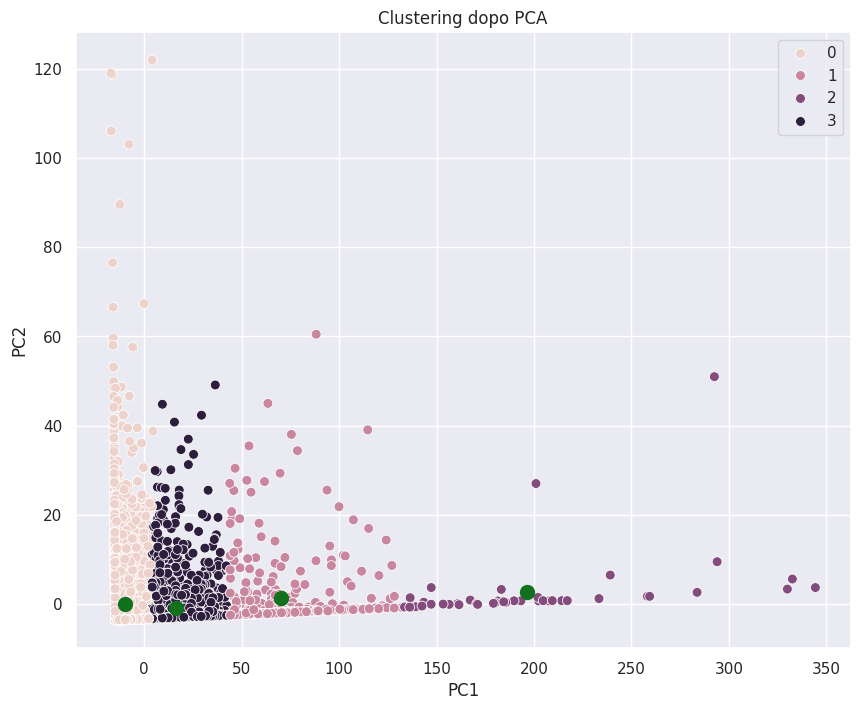

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='g', s=100, label="centers")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering dopo PCA")
plt.grid(True)
plt.show()

Questi sono i nuovi risultati dopo aver ridotto la dimensionalità. Dobbiamo capire il peso delle varie feature in questo nuovo cluster

In [ ]:
# Caricamento delle componenti principali
loadings = pca.components_

# Creazione di un DataFrame per visualizzare i carichi
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=df.drop("CUST_ID", axis=1).columns)

loadings_df

,PC1,PC2
BALANCE_FREQUENCY,0.001798,0.005438
PURCHASES_FREQUENCY,0.009181,-0.009721
ONEOFF_PURCHASES_FREQUENCY,0.006536,-0.001303
PURCHASES_INSTALLMENTS_FREQUENCY,0.008473,-0.007796
CASH_ADVANCE_FREQUENCY,-0.001088,0.023186
CASH_ADVANCE_TRX,-0.019561,0.991445
PURCHASES_TRX,0.998533,0.018775
PRC_FULL_PAYMENT,0.001917,-0.006889
TENURE,0.006588,-0.006833
BALANCE,0.006146,0.059915


## 4. Analisi delle spese medie in termini di:
Spese medie
‣ BALANCE, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES

Abitudini di pagamento
‣ MINIMUM_PAYMENTS, PRC_FULL_PAYMENT

Frequenza di utilizzo della carta
‣ CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, PURCHASES_FREQUENCY

Per fare questa analisi, aggiungiamo una colonna contenente il cluster di riferimento di quello specifico sample.

In [ ]:
df["cluster"]=clusters

# Prendiamo in considerazione le features principali per ogni richiesta
features_to_analyze=["BALANCE",
                     "ONEOFF_PURCHASES",
                     "INSTALLMENTS_PURCHASES",
                     "MINIMUM_PAYMENTS",
                     "PRC_FULL_PAYMENT",
                     "CASH_ADVANCE",
                     "CASH_ADVANCE_FREQUENCY",
                     "PURCHASES_FREQUENCY"]

# Raggruppiamo ora le medie dei valori delle features per ogni cluster
cluster_summary = df.groupby('cluster')[features_to_analyze].mean().round(2)
cluster_summary

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,PURCHASES_FREQUENCY
cluster,,,,,,,,
0,-0.05,-0.22,-0.25,-0.03,0.13,0.04,0.15,0.36
1,0.66,1.63,1.78,0.29,0.26,-0.04,0.10,0.98
2,1.55,3.92,4.43,1.24,0.24,-0.17,0.06,0.97
3,0.00,0.39,0.47,0.02,0.23,-0.16,0.09,0.91


Analisi dei cluster:
- Cluster 0: Clienti molto sporadici, con spese e pagamenti inferiori alla media. Hanno una frequenza di acquisto molto bassa, indicatore che effettuano veramente pochi acquisti e solo se ne hanno davvero necessità.

- Cluster 1: Clienti attivi e regolari, hanno una frequenza d'acquisto altissima e una spesa alta, senza utilizzare le rate e utilizzando un'unica soluzione.

- Cluster 2: Clienti alto-spendenti, con una capacità di acquisto molto alta e degli import decisamente al di sopra della media. Non ricorrono agli anticipi, potrebbero essere i clienti migliori da fidelizzare.

- Cluster 3: Clienti intermedi, con una frequenza alta ma degli importi più contenuti. Spese nella media, con buona frequenza d’uso della carta e comportamento di pagamento corretto.

Andiamo ora a visualizzare i vari cluster sul grafico

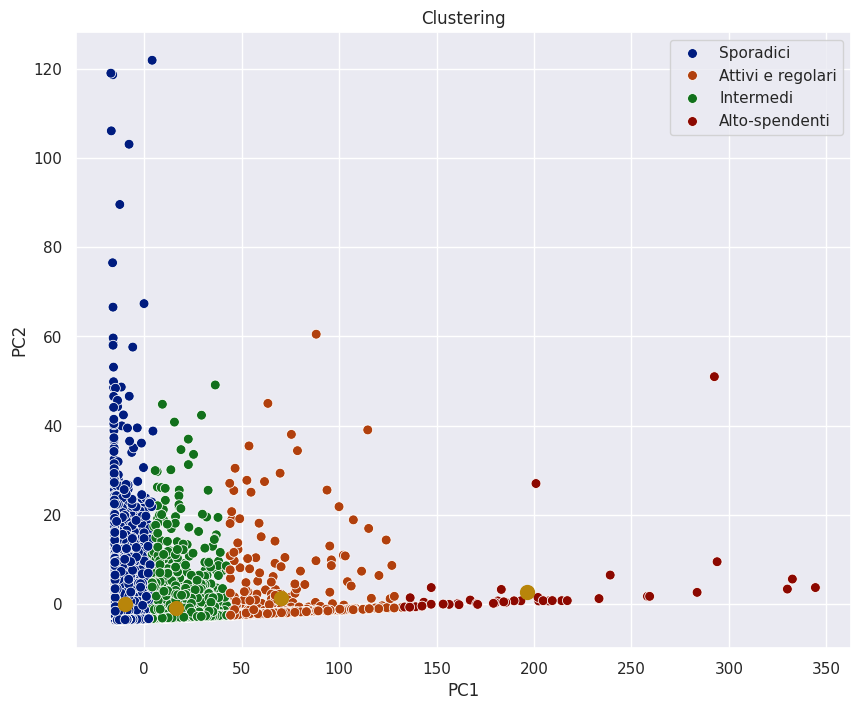

In [ ]:
y_means=kmeans.predict(X_pca)
cat={0:"Sporadici", 1:"Attivi e regolari", 2:"Alto-spendenti", 3:"Intermedi"}
vfunc=np.vectorize(lambda x:cat[x])
categories=vfunc(y_means)

plt.figure(figsize=(10,8))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=categories, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='y', s=100, label="centers")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering")
plt.grid(True)
plt.show()

## 5. Sviluppo delle strategie di marketing

A seguito dell’analisi di clustering effettuata tramite PCA e K-Means, sono stati identificati quattro cluster distinti di clienti, ognuno con comportamenti specifici in termini di spesa, frequenza d’uso della carta e abitudini di pagamento. Di seguito vengono proposte strategie di marketing mirate per ciascun segmento, con l’obiettivo di massimizzare la fidelizzazione, aumentare l’utilizzo della carta e ottimizzare il ritorno sugli investimenti.

### Cluster 0 – Sporadici
#### Profilo
Clienti con scarso utilizzo della carta, bassa frequenza di transazioni e importi modesti.

#### Strategie consigliate:

- Incentivare l’uso ricorrente con cashback su spese quotidiane.
- Offerte promozionali su acquisti rateali o pagamenti digitali.
- Campagne educative per far conoscere i vantaggi dell’uso regolare della carta.

### Cluster 1 – Attivi e regolari
#### Profilo
Clienti che utilizzano la carta frequentemente, in modo equilibrato tra one-off e rate, con un buon comportamento finanziario.

#### Strategie consigliate

- Offerte esclusive e personalizzate per aumentare il valore delle transazioni.
- Programmi fedeltà e premi per incentivare la continuità dell’utilizzo.
- Promozione di servizi finanziari aggiuntivi (es. aumento del limite di credito).

### Cluster 2 – Alto-spendenti
#### Profilo
Clienti ad alto valore, con spese elevate, utilizzo molto frequente e pagamenti regolari. Poco interessati agli anticipi in contanti.

#### Strategie consigliate:
- Accesso a carte premium o “black” con servizi esclusivi (viaggi).
- Programmi di loyalty personalizzati, con premi di fascia alta.
- Proposta di prodotti finanziari evoluti (investimenti, piani risparmio).

### Cluster 3 – Intermedi
#### Profilo
Clienti con comportamento medio su tutte le variabili, regolari ma non intensivi nell’uso.

#### Strategie consigliate:

- Offerte mirate per incrementare l’engagement (es. sconti per soglie di spesa).
- Educazione finanziaria e comunicazione personalizzata per stimolare acquisti a rate.
- Incentivi per avvicinare questi clienti al cluster 1 (maggior utilizzo) o cluster 2 (spesa elevata).

### Conclusione
La segmentazione proposta consente a FinTech Solutions S.p.A. di:

- Personalizzare le campagne di marketing sulla base di dati oggettivi
- Ottimizzare l’allocazione delle risorse, puntando sui clienti a maggiore potenziale
- Aumentare la redditività e la fidelizzazione, rispondendo ai reali bisogni dei clienti.

La metodologia adottata potrà essere facilmente estesa e aggiornata nel tempo, integrando anche ulteriori dati comportamentali o demografici.